In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

In [2]:
#import data
orderdetails_data = pd.read_csv(r"C:\Users\CHINELO\Desktop\Data\Restaurant+Orders+CSV\order_details.csv")
menuitem_data = pd.read_csv(r"C:\Users\CHINELO\Desktop\Data\Restaurant+Orders+CSV\menu_items.csv")

#rename column 
menuitem_data.rename(columns={'menu_item_id': 'item_id'},inplace=True) 
#merge the dataframe
restaurant_data= menuitem_data.merge(orderdetails_data, on='item_id', how='left')


In [3]:
#Concat date and time
restaurant_data['order_datetime'] = pd.to_datetime(restaurant_data['order_date'].str.cat(restaurant_data['order_time'], sep=' '),format='%m/%d/%Y %I:%M:%S %p')
restaurant_data.head()

,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time,order_datetime
0,101,Hamburger,American,12.95,11,6,01/01/2023,12:29:36 PM,2023-01-01 12:29:36
1,101,Hamburger,American,12.95,26,11,01/01/2023,1:02:59 PM,2023-01-01 13:02:59
2,101,Hamburger,American,12.95,43,17,01/01/2023,1:53:00 PM,2023-01-01 13:53:00
3,101,Hamburger,American,12.95,63,24,01/01/2023,2:23:01 PM,2023-01-01 14:23:01
4,101,Hamburger,American,12.95,71,27,01/01/2023,3:11:17 PM,2023-01-01 15:11:17


In [4]:
restaurant_data.to_csv('data.csv', index=False)

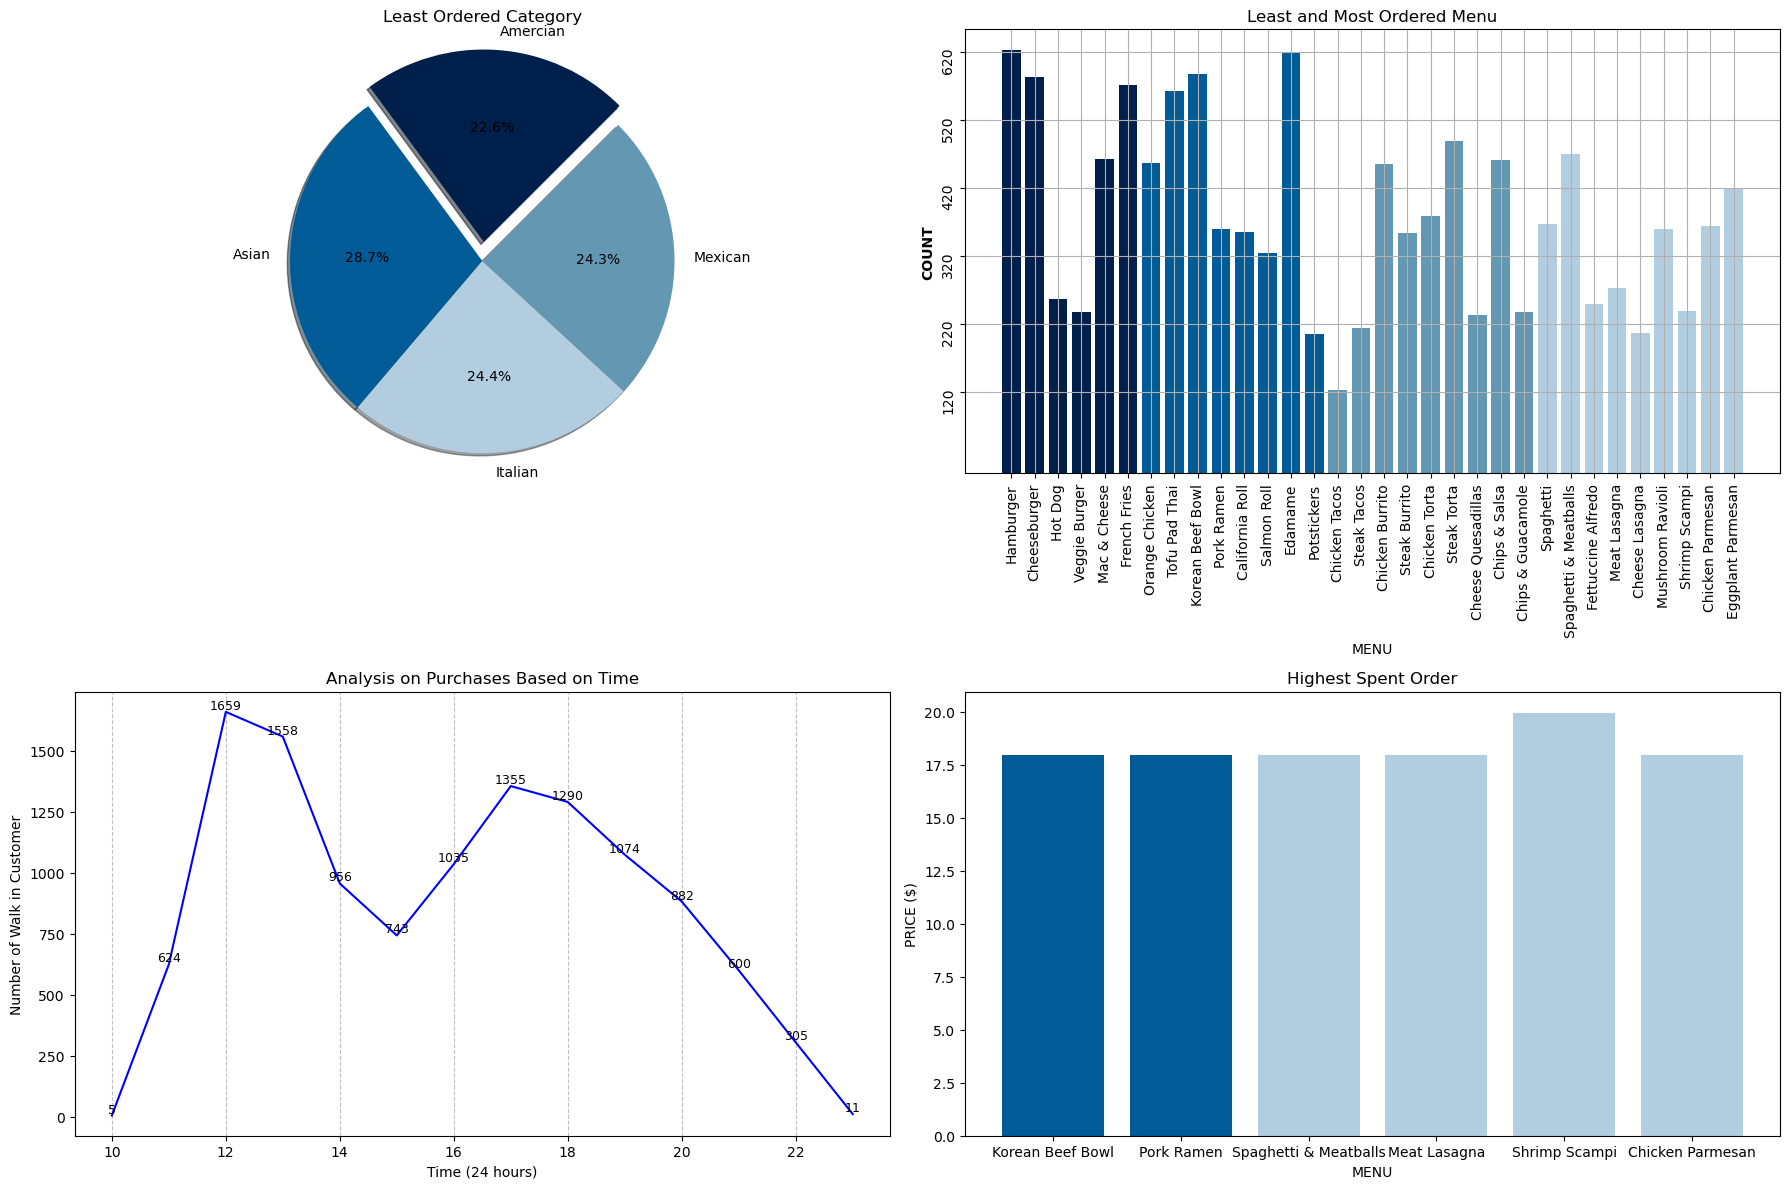

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
cusines = restaurant_data.groupby('category')['item_id'].count()
labels= ['Amercian', "Asian", 'Italian', 'Mexican']
color = {'#011f4b':'American','#005b96':'Asian','#b3cde0':'Italian','#6497b1':'Mexican'}
axs[0,0].pie(cusines, autopct='%1.1f%%', startangle=45, shadow=True, labels=labels, radius=2, explode=[0.2,0,0,0], colors=color)
axs[0,0].axis('equal') 
axs[0,0].set_title('Least Ordered Category' )


least_most = restaurant_data.groupby('item_name', sort=False).count().reset_index() 
color = menuitem_data['category'].apply(lambda x:'#011f4b' if x == 'American' else
                             ('#6497b1' if x == 'Mexican' else
                             ('#005b96' if x == 'Asian' else '#b3cde0')))
axs[0,1].bar(least_most['item_name'],least_most['item_id'], color=color)
axs[0,1].set_ylabel('COUNT', fontweight='bold')
axs[0,1].set_xlabel("MENU")
axs[0,1].set_title('Least and Most Ordered Menu')
y_ticks = [120,220,320,420,520,620]
axs[0,1].set_yticks(y_ticks)
axs[0,1].grid('y')
axs[0,1].tick_params(rotation=90)

# exctracting the hour from time
restaurant_data.loc[:, 'order_hour'] = restaurant_data['order_datetime'].dt.hour
date_time = restaurant_data.groupby('order_hour')['order_details_id'].count()
axs[1,0].plot(date_time.index, date_time.values, color='b')
axs[1,0].grid(axis='x', linestyle='--', alpha=0.8)
for x, y in zip(date_time.index, date_time.values):
    axs[1,0].text(x, y, str(y), fontsize=9, ha='center', va='bottom')
axs[1,0].set_xlabel('Time (24 hours)')
axs[1,0].set_ylabel('Number of Walk in Customer')
axs[1,0].set_title('Analysis on Purchases Based on Time')
    

value = restaurant_data.groupby('item_name').filter(lambda x: max(x['price']) > 17.5)
colors = value['category'].apply(lambda x :'#011f4b' if x == 'American' else
                                     ('#005b96' if x == 'Asian' else 
                                     ('#b3cde0' if x == 'Italian' else '#5F9EA0')))
axs[1,1].bar(value['item_name'], value['price'], color=colors)
axs[1,1].set_title('Highest Spent Order')
axs[1,1].set_xlabel('MENU')
axs[1,1].set_ylabel('PRICE ($)')




# Adjust layout
plt.tight_layout()


plt.show()